In [1]:
import numpy as np
import pandas as pd
import healpy as hp
import matplotlib.pyplot as plt
from astropy.io import fits

nside = 512

In [2]:
#method 1
noise = fits.open('/mn/stornext/d16/cmbco/bp/johanres/commander_camb/camb_data/tod_070_rms_c0001_k000797_nside512.fits')
noise_data = noise[1].data
noise_temp = noise_data['TEMPERATURE'].flatten()
noise_q    = noise_data['Q_POLARISATION'].flatten()
noise_u    = noise_data['U_POLARISATION'].flatten()

sigma_T = np.sqrt(np.mean(noise_temp**2))
sigma_P = np.sqrt(np.mean(noise_q**2))

Nl_T_1 = sigma_T**2 * 4.*np.pi/(12.*nside**2)
Nl_P_1 = sigma_P**2 * 4.*np.pi/(12.*nside**2)
print(Nl_T_1, Nl_P_1)

0.0031541074608780824 0.0063438198557865194


1536


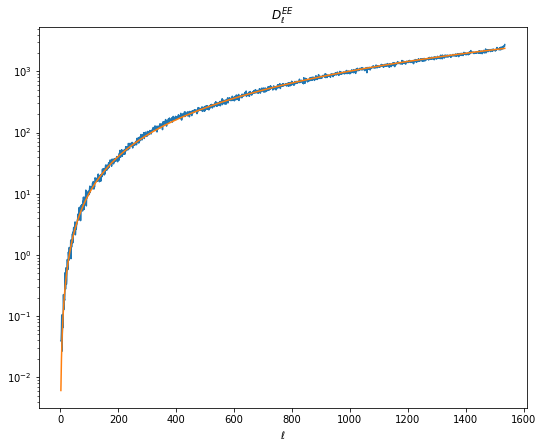

In [6]:
#method 2
Cls = pd.read_csv("../../PolSpice/PolSpice_v03-07-05/cl_hp_apodize.dat", skiprows = [0], delim_whitespace=True, 
                  names = ["TT", "EE", "BB", "TE", "TB", "EB", "ET", "BT", "BE"])
Cl_tt = np.array(Cls["TT"])
Cl_ee = np.array(Cls["EE"])
Nl_T_2 = 0.00315

ells = np.arange(2, len(Cl_tt))
print(len(Cl_tt))
ell_factor = ells*(ells+1)/(2*np.pi)
plt.figure(figsize = (7*1.25, 7))
plt.plot(ells, Cl_ee[2:]*ell_factor)
plt.plot(ells, Nl_P_1*ell_factor)
plt.yscale("log")
#plt.ylim([2*10**2, 10**4])
plt.xlabel(r"$\ell$")
plt.title(r"$D_\ell^{EE}$")
plt.show()